In [266]:
import pandas as pd
import os 
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [267]:
df = pd.read_csv('/Users/Aviv/Downloads/aviv_stargo/UnicornCompanies-timestamp.csv'
                  , encoding='cp1252')
df

,Startup Name,Industry,Founding Year,Unicorn Entry Year,Profit in 2021,Current Valuation,Acquisitions,IPO Status
0,PhysicsWallah,Edtech,2016.0,2022.0,-$0.877 Million,$1.1 Billion,0.0,Unlisted
1,LeadSquared,SaaS- CRM,2011.0,2022.0,-$1 Million,$1 BIllion,0.0,Unlisted
2,ElasticRun,E-commerce Logistics,2015.0,2022.0,-$12 Million,$1.5 Billion,0.0,Unlisted
3,LEAD School,Edtech,2012.0,2022.0,-$15 Million,$1.1 Billion,1.0,Unlisted
4,Purplle,E-commerce Personal Care,2012.0,2022.0,-$6 Million,$1.1 Billion,1.0,Unlisted
...,...,...,...,...,...,...,...,...
924,Founders,"Gautam Kapoor, Saahil Goel, Vishesh Khurana an...",NaN,NaN,NaN,NaN,NaN,NaN
925,Founded,2017,NaN,NaN,NaN,NaN,NaN,NaN
926,Investors,"Tamesek Holdings, Lightrock, Bertelsmann, Moor...",NaN,NaN,NaN,NaN,NaN,NaN
927,Products and Services,"Ecommerce Logistics and Shipping Software, Cou...",NaN,NaN,NaN,NaN,NaN,NaN


In [270]:
df = df.dropna()
numric_df = df.copy()


#clean this columns to change to numric:
numric_df['Profit in 2021'] = numric_df['Profit in 2021'].str.replace('$','')
numric_df['Profit in 2021'] = numric_df['Profit in 2021'].str.replace('Million','')
numric_df['Current Valuation'] = numric_df['Current Valuation'].str.replace('$','')
numric_df['Current Valuation'] = numric_df['Current Valuation'].str.replace('Billion','')
numric_df['Current Valuation'] = numric_df['Current Valuation'].str.replace('BIllion','')

numric_df = numric_df.rename(columns = {'Profit in 2021':'Profit in 2021 in Millions $', 'Current Valuation':'Current Valuation in Billions $'})

#change to numric:
numric_df['Profit in 2021 in Millions $'] = pd.to_numeric(numric_df['Profit in 2021 in Millions $'])
numric_df['Current Valuation in Billions $'] = pd.to_numeric(numric_df['Current Valuation in Billions $'])



#show only the profitable companies:
positive_profit_df = df.loc[~df['Profit in 2021'].str.contains('-')]

#and the same actions as above...:
positive_profit_df['Profit in 2021'] = positive_profit_df['Profit in 2021'].str.replace('$','')
positive_profit_df['Profit in 2021'] = positive_profit_df['Profit in 2021'].str.replace('Million','')
positive_profit_df['Current Valuation'] = positive_profit_df['Current Valuation'].str.replace('$','')
positive_profit_df['Current Valuation'] = positive_profit_df['Current Valuation'].str.replace('Billion','')
positive_profit_df['Current Valuation'] = positive_profit_df['Current Valuation'].str.replace('BIllion','')
positive_profit_df = positive_profit_df.rename(columns = {'Profit in 2021':'Profit in 2021 in Millions $', 'Current Valuation':'Current Valuation in Billions $'})
positive_profit_df['Profit in 2021 in Millions $'] = pd.to_numeric(positive_profit_df['Profit in 2021 in Millions $'])
positive_profit_df['Current Valuation in Billions $'] = pd.to_numeric(positive_profit_df['Current Valuation in Billions $'])

positive_profit_df



,Startup Name,Industry,Founding Year,Unicorn Entry Year,Profit in 2021 in Millions $,Current Valuation in Billions $,Acquisitions,IPO Status
8,Games24x7,Gaming,2006.0,2022.0,13.000,2.50,0.0,Unlisted
9,Amagi,"Media, Advertising",2008.0,2022.0,2.000,1.00,0.0,Unlisted
42,Mamaearth,E-commerce Personal Care,2016.0,2021.0,24.000,1.07,4.0,Unlisted
43,Infra.Market,B2B E-commerce,2016.0,2021.0,3.000,2.50,2.0,Unlisted
44,Five Star Business Finance,Financial Services,1984.0,2021.0,44.000,1.40,0.0,Registered
45,OfBusiness,Building Materials,2015.0,2021.0,6.000,5.00,1.0,Unlisted
46,CoinSwitch Kuber,Cryptocurrencies,2017.0,2021.0,8.000,1.90,0.0,Unlisted
69,RazorPay,Fintech,2014.0,2020.0,0.875,7.50,5.0,Unlisted
70,Zerodha,Stockbroker,2010.0,2020.0,140.000,2.00,0.0,Unlisted
71,PhonePe,Fintech Payments,2015.0,2020.0,217.000,5.50,5.0,Unlisted


In [269]:
#show to every industry how much profit the do last year from min to max:

g = positive_profit_df.groupby('Industry')['Profit in 2021 in Millions $'].apply(list)  
g.sort_values(ascending=True)

Industry
Fintech                         [0.875]
Media, Advertising                [2.0]
B2B E-commerce                    [3.0]
E-commerce- Eyewear               [3.0]
Building Materials                [6.0]
Edtech                            [6.0]
Cryptocurrencies                  [8.0]
Gaming                           [13.0]
E-commerce Personal Care         [24.0]
E-commerce                  [26.0, 7.0]
Fantasy Sports                   [41.0]
Financial Services               [44.0]
Stockbroker                     [140.0]
Foodtech                        [203.0]
Fintech Payments                [217.0]
Name: Profit in 2021 in Millions $, dtype: object

<AxesSubplot:xlabel='Industry'>

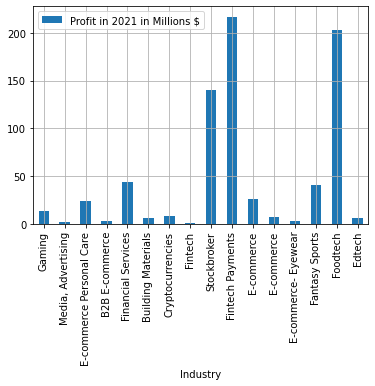

In [215]:
#show it on bar plot:

ax = positive_profit_df.plot(x= 'Industry',y = 'Profit in 2021 in Millions $',kind = 'bar',grid=True)
ax

In [271]:
#show the valuable industries:
new = numric_df[['Industry','Current Valuation in Billions $']]

#sum the current value of each industy: 
a = new.groupby(['Industry','Current Valuation in Billions $']).sum()

#sort:
a = a.sort_values(by=['Current Valuation in Billions $'])
a


,
Industry,Current Valuation in Billions $
E-commerce,0.013
E-commerce- Groceries,0.568
Adtech,1.000
"Media, Advertising",1.000
PropTech,1.000
...,...
Hospitality,9.000
Foodtech,10.700
E-commerce Finance,16.000


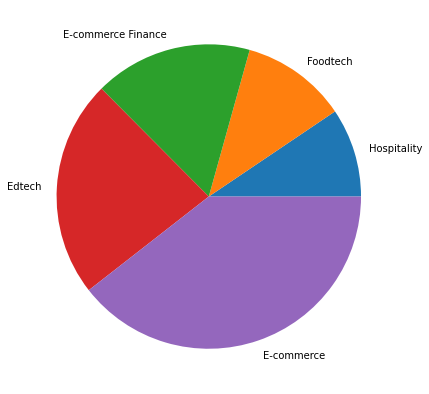

In [272]:
#top 5 strongest industries:
top_5_df = a.tail(5)
list_top_5 = top_5_df.index.tolist()

labels = []
for i in range(len(list_top_5)):
    labels.append(list_top_5[i][0])
data = []    
for i in range(len(list_top_5)):
    data.append(list_top_5[i][1])

# Creating plot
fig = plt.figure(figsize =(10, 7))
plt.pie(data, labels = labels)
 
# show plot
plt.show()